In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from google.colab import files
uploaded = files.upload()




Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [3]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(df.head)

<bound method NDFrame.head of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationFi

In [4]:
# Check for nulls
df.isnull().sum()

# Convert Attrition to 0/1
df['AttritionFlag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Add Age Groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[17, 30, 40, 50, 60],
                        labels=['18–30', '31–40', '41–50', '51–60'])

# Add Income Levels
df['IncomeLevel'] = pd.cut(df['MonthlyIncome'],
                           bins=[0, 3000, 6000, 9000, 15000, df['MonthlyIncome'].max()],
                           labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])


In [6]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionFlag,AgeGroup,IncomeLevel
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,1,41–50,Low
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,0,41–50,Low
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,1,31–40,Very Low
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,0,31–40,Very Low
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,0,18–30,Low
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,8,2,2,7,7,3,6,0,31–40,Low
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,12,3,2,1,0,0,0,0,51–60,Very Low
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,1,2,3,1,0,0,0,0,18–30,Very Low
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,10,2,3,9,7,1,8,0,31–40,High
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,17,3,2,7,7,7,7,0,31–40,Low


[Text(0, 0, '237'), Text(0, 0, '1233')]

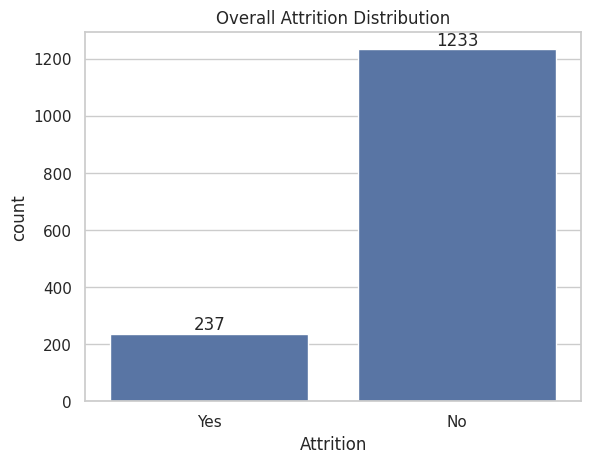

In [18]:
ax=sns.countplot(x='Attrition', data=df)
plt.title("Overall Attrition Distribution")
ax.bar_label(ax.containers[0])


[Text(0, 0, '354'), Text(0, 0, '828'), Text(0, 0, '51')]

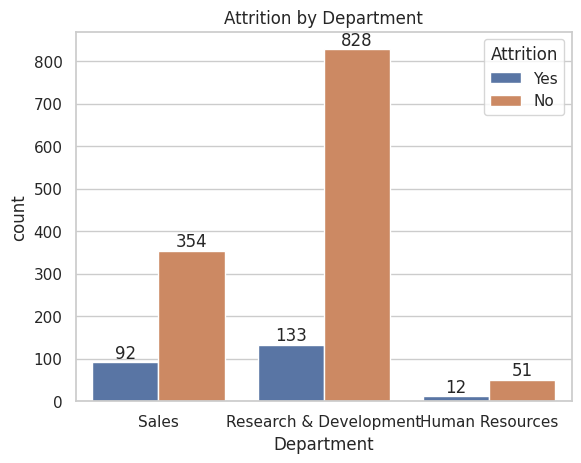

In [13]:
bx=sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Attrition by Department")
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])

[Text(0, 0, '286'), Text(0, 0, '534'), Text(0, 0, '288'), Text(0, 0, '125')]

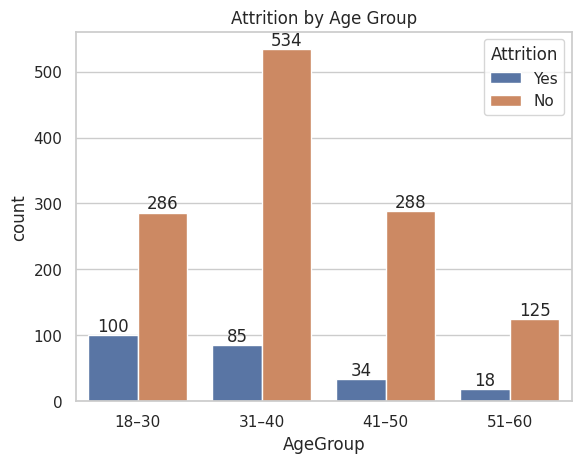

In [22]:
cx=sns.countplot(x='AgeGroup', hue='Attrition', data=df)
plt.title("Attrition by Age Group")
cx.bar_label(cx.containers[0])
cx.bar_label(cx.containers[1])



Text(0.5, 1.0, 'Monthly Income vs Attrition')

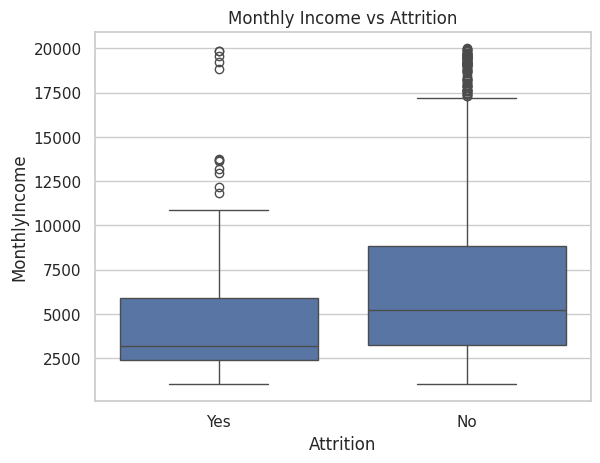

In [25]:
dx=sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")


In [31]:
df.to_csv("Cleaned_Attrition_Data.csv", index=False)
files.download("Cleaned_Attrition_Data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>